In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import os

plt.style.use(['science', 'grid'])
plt.rc('figure', titlesize = 33, figsize = (21, 7))
plt.rc('axes', titlesize = 27, labelsize = 21, titlepad = 21)
plt.rc('xtick', labelsize = 17)
plt.rc('ytick', labelsize = 17)


In [44]:
# preprocessing CGMacros data
for i in range(1, 50):
    # open temp file
    if i < 10:
        filestring = "CGMacros-00"
    else:
        filestring = "CGMacros-0"
    
    try: 
        temp = pd.read_csv(os.path.join('data', filestring + str(i), filestring + str(i) + ".csv"))
    except FileNotFoundError:
        print(f"File {filestring + str(i)} not found")
        continue
    
    # preprocess data
    temp["Timestamp"] = pd.to_datetime(temp["Timestamp"])
    temp.columns = (temp.columns.
        str.lower().
        str.replace(' ', '_').
        str.replace('(', '').
        str.replace(')', '')
    )

    # Define the output directory and filename
    output_dir = os.path.join('data', filestring)
    new_filestring = os.path.join(output_dir, f"{filestring}-preprocessed.csv")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Save the preprocessed data to a new CSV file
    temp.to_csv(new_filestring, index=False)

File CGMacros-024 not found
File CGMacros-025 not found
File CGMacros-037 not found
File CGMacros-040 not found


In [46]:
i = 1
filestring = "CGMacros-00"

temp = pd.read_csv(os.path.join('data', filestring + str(i), filestring + str(i) + "-preprocessed.csv"))

temp.drop(columns=['unnamed:_0'], inplace=True)

temp


,timestamp,libre_gl,dexcom_gl,hr,calories_activity,mets,meal_type,calories,carbs,protein,fat,fiber,amount_consumed_,image_path
0,2020-05-01 10:30:00,84.000000,NaN,56.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-01 10:31:00,84.133333,NaN,56.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-01 10:32:00,84.266667,NaN,57.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-01 10:33:00,84.400000,NaN,54.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-01 10:34:00,84.533333,NaN,55.0,1.04840,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,2020-05-11 15:55:00,81.666667,NaN,78.0,2.93552,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14726,2020-05-11 15:56:00,81.733333,NaN,79.0,3.14520,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14727,2020-05-11 15:57:00,81.800000,NaN,80.0,3.56456,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14728,2020-05-11 15:58:00,81.866667,NaN,81.0,3.56456,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
non_numeric = []
numeric = []

for column in bio.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        numeric.append(column)
    else:
        non_numeric.append(column)
        
        
bio["diabe"]
        

,subject,Age,Gender,BMI,Body weight,Height,Self-identify,A1c PDL (Lab),Fasting GLU - PDL (Lab),Insulin,...,LDL (Cal),VLDL (Cal),Cho/HDL Ratio,Collection time PDL (Lab),#1 Contour Fingerstick GLU,Time (t),#2 Contour Fingerstick GLU,Time (t).1,#3 Contour Fingerstick GLU,Time (t).2
0,1,27,M,22.265239,133.8,65.0,Hispanic/Latino,5.4,91,2.5,...,130,13,2.9,11:06:00 AM,89,9:40,73,12:11,81,13:18
1,2,49,F,30.946742,169.2,62.0,Hispanic/Latino,5.5,93,14.8,...,78,12,2.0,7:38:00 AM,91,7:52,123,9:21,80,10:22
2,3,59,F,26.948690,157.0,64.0,Hispanic/Latino,6.5,118,17.4,...,90,31,2.6,7:25:00 AM,119,7:38,166,9:23,98,10:23
3,4,33,F,42.384279,262.6,66.0,Hispanic/Latino,5.5,105,19.4,...,164,60,5.8,7:20:00 AM,109,7:37,110,9:04,90,10:01
4,5,51,F,30.957534,172.0,62.5,Hispanic/Latino,6.6,144,12.9,...,157,78,7.1,7:45:00 AM,139,8:59,215,10:52,130,11:54


<Axes: >

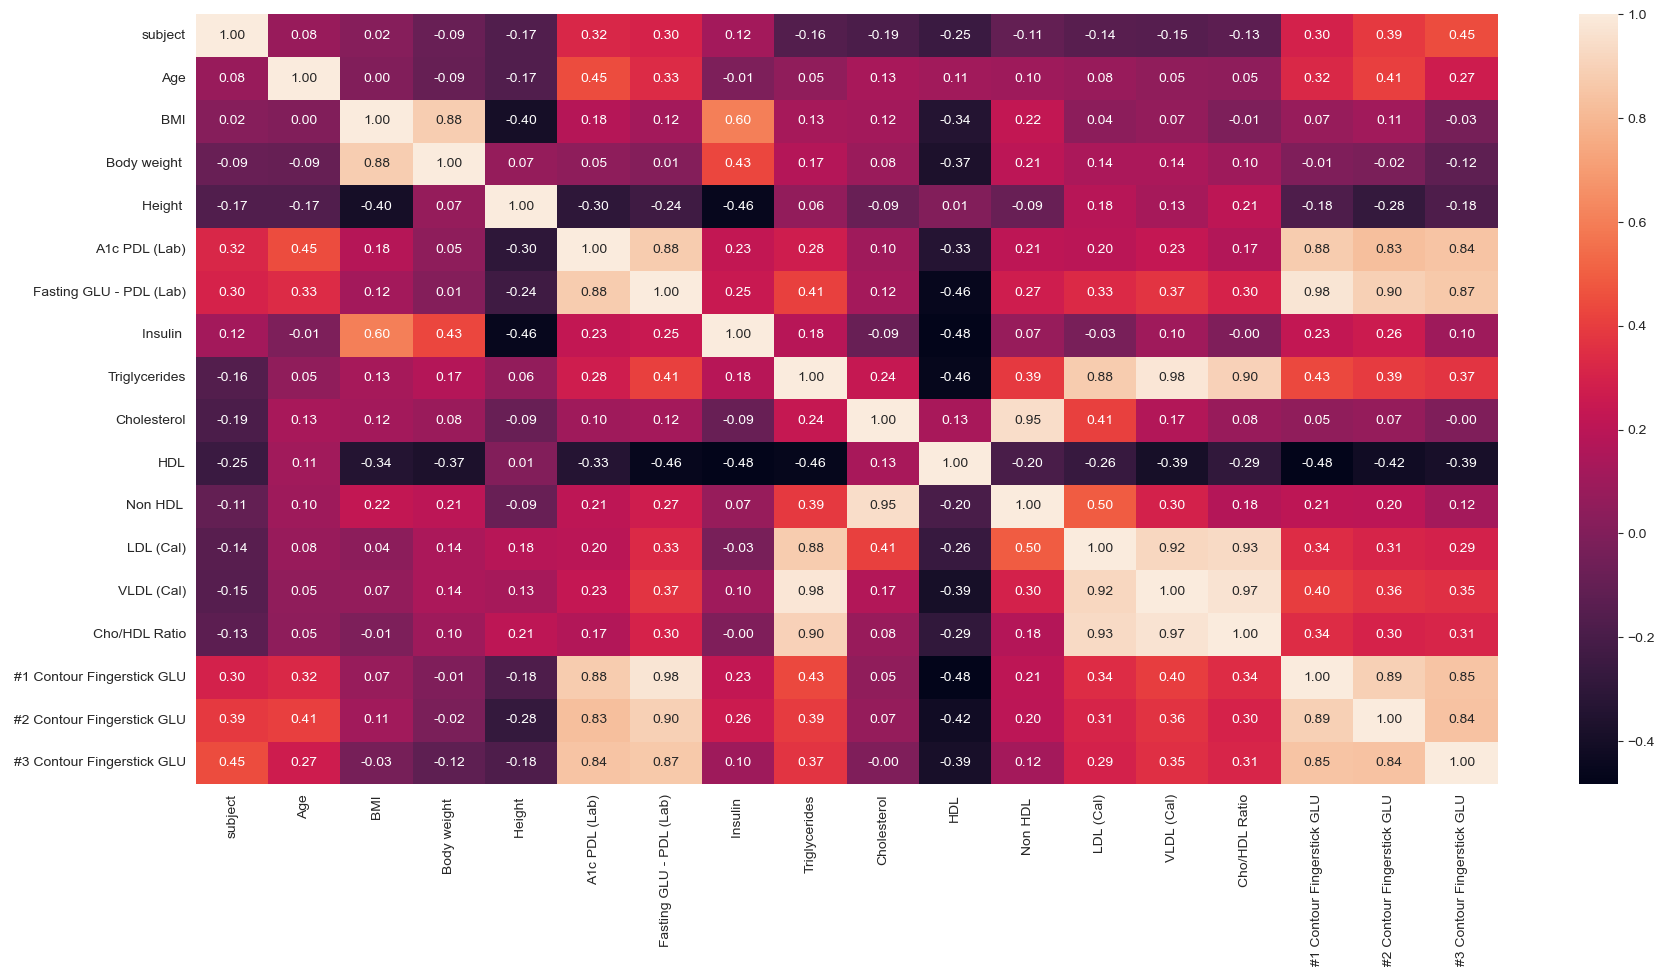

In [17]:
plt.figure(figsize=(21, 10))
sns.heatmap(df[numeric].corr(), annot=True, fmt=".2f")

## Regression Model